# Практическое задание 2

**Правила**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Особенности**
* Рассчитано на **три недели**.
* Состоит из **двух частей**. Обе части **не зависят друг от друга**.
* Задание большое, и сделать его в последний момент не получится. Поэтому сдача происходит *(почти)* **каждую неделю**.
* В вашем решении, которое вы сдаете в определенную неделю, в самом начале ноутбука должно быть указано, что было сделано за эту неделю. При этом за каждую сдачу должно быть сделано не менее 10% задания, иначе будет применен штраф.
* Что означает "*(почти) каждую неделю*": у вас **есть возможность пропустить одну неделю** сдачи из 3, но при условии, что в первую неделю нужно обязательно сдать хотя бы 10 процентов.
* В конце срока сдачи задания вам необходимо предоставить **полностью готовое решение** и отчет о том, что вы сделали **на каждой неделе**. Если не предоставить отчет, проверяющий может оценить объем по каждому дедлайну на свое усмотрение.
* Задание основано на открытых данных. К ним можно найти много ноутбуков с кодом. С ними будет полезно ознакомиться, поучиться чему-то новому, и что-то применить для своего решения. При этом **копирование бОльшей части кода без собственных комментариев и обновления кода будет штрафоваться**.

**Баллы**
* Часть 1 &mdash; 100 баллов
* Часть 2 &mdash; 100 баллов

**Рекомендации по выполнению**
1. Начинайте выполнение задания как можно раньше!
2. "Съешьте на завтрак слона". Задание разделено на несколько независимых частей. Начните выполнение с той части, которая вам кажется наиболее сложной и непонятной.
3. В Kaggle можно работать с ноутбуками и обучать модели. Иногда, возможно, будет удобнее, чем в Google Colab.
4. Для всех задач **рекомендуется** писать **аккуратный код в одном** `.py`-файле и обращаться к нему в jupyter-ноутбуке как-нибудь так: ```from my_super_module import gpt5```. Ноутбук используйте для запуска экспериментов, визуализаций, комментирования результатов и выводов.
5. Скорее всего в процессе выполнения задания вы будете логгировать промежуточные результаты, строить кривые обучения и т.д. Для этого мы рекомендуем присмотреться к инструментам [Weights & Biases](https://wandb.ai/), [Neptune](https://neptune.ai/) и т.п. Многие такие инструменты имеют интеграцию в `transformers`! В случае их использования не забудьте вставить получившиеся графики в ноутбук.
6. Используйте [Trainer](https://huggingface.co/docs/transformers/main_classes/trainer) из `transformers` для обучения моделей. Не стоит строить новый велосипед и снова писать классический цикл обучения, вы уже делали это раньше ;)
7. В процессе обучения не забывайте сохранять промежуточные результаты (чекпоинты моделей). Это удобно делать в google-drive, если пользуетесь Colab.
8. В NLP размер модели, а также количество и качество обучающих данных **имеет значение**. Не стоит брать совсем уж легкие архитектуры. Обучение в задачах скорее всего будет занимать не 5-10 минут, этого не стоит бояться.
9. Разумно подойдите к выбору гиперпараметров, исходя из вычислительных ресурсов. Обратите внимание на [пост](https://huggingface.co/docs/transformers/main/en/perf_train_gpu_one). На последнем занятии были рассмотрены техники, позволяющие обучать быстро даже большие модели на **одном** GPU.
___

## Часть 1.

В этой части задания вы будете работать с данными уже завершившегося [соревнования](https://github.com/dialogue-evaluation/RuSentNE-evaluation) по анализу тональности к именованным сущностям в новостных текстах. Посмотрим на описание, которое представлено в репозитории.

Анализ тональности текста &mdash; извлечение выраженной в тексте эмоциональной оценки к некоторой сущности &mdash; одно из наиболее активно развивающихся направлений в автоматической обработке текстов.

Анализ тональности новостных текстов &mdash; важное направление в области анализа мнений, поскольку обнаружение, отслеживание трендов тональности в новостном потоке важно для построения разного рода аналитических систем, отслеживания имиджа в СМИ конкретных людей или компаний.

Тональность по отношению к сущности в новостном тексте может происходить по крайней мере из трех разных источников:
* мнения автора текста;
* цитируемого мнения, при этом сам носитель мнения может быть упомянут или не упомянут в тексте;
* имплицитного мнения, которое следует из каких-либо упомянутых действий или реакций, например, X уволил Y. Такая информация часто присутствует даже при внешне нейтральном изложении событий.

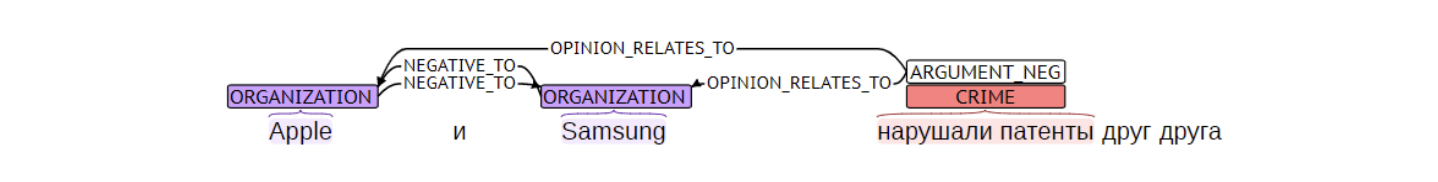

Вам предстоит решить задачу извлечения из новостных текстов тональности трёх классов (негативная, позитивная, нейтральная) по отношению к заранее размеченным сущностям типа `PERSON`, `ORGANIZATION`, `PROFESSION`, `COUNTRY`, `NATIONALITY` в рамках отдельного предложения.

Данные представлены в следующем формате:
* `sentence` &mdash; предложение;
* `entity` &mdash; объект анализа тональности;
* `entity_tag` &mdash; тип сущности, может быть `PERSON`, `ORGANIZATION`, `PROFESSION`, `COUNTRY`, `NATIONALITY`;
* `entity_pos_start_rel` и `entity_pos_end_rel` &mdash; индексы начала и конца упоминания сущности в предложении;
* `label` &mdash; метка тональности (0 &mdash; нейтрально, -1 &mdash; отрицательно, 1 &mdash; положительно).

Основной метрикой соревнования является $F_1-macro$ с **усреднением по двум классам**. Нейтральный класс исключается, т.к. важно выделить именно мнение. Таким образом, процедура оценки следующая:

1. Отдельно вычислить $F_1$ для каждого из классов.
2. Усреднить полученные значения $F_1$ для двух из трех классов.

Предлагается работать с `train` и `dev(val)` выборками. Для начала изучите бейзлайн, используемый авторами. Он содержит реализацию многих вспомогательных вещей, которыми мы на занятиях и в домашних заданиях пользовались через библиотеку `transformers`. Вы можете подчерпнуть некоторые моменты, но полностью копировать код бейзлайна **запрещается**.

Обучите свое собственное базовое решение и посчитайте качество на валидации. Подумайте, в каком формате лучше подавать на вход модели используемые данные? Вам может потребоваться добавить спец. тоцены в словарь, сделать это можно [так](https://github.com/huggingface/tokenizers/issues/247).

Попробуйте улучшить качество, проведя как минимум **два эксперимента**, в которых вы можете:
* Использовать другую базовую модель;
* Предварительно обучить базовую модель на задачу MLM на имеющимся корпусе текстов;
* Попробовать разные стратегии получения итогового представления и разные форматы входных данных. Например, можно сделать предсказание не из `[CLS]` токена, а из спец. токена (например `[PERSON]`) сущности **или** из вектора, полученного после пуллинга на токенах (например `['В', '##ася', 'П', '##уп', '##кин']`) описания сущности.
В этих случаях вход модели может выглядеть как-то так:
`[CLS] <текст новости> [PERSON] Вася Пупкин [SEP] <продолжение новости> [SEP]`
* Найти статьи, релевантные задаче, а также попробовать реализовать и применить описанные там методы. Можете изучить [статью](https://arxiv.org/pdf/2305.17679.pdf) от авторов соревнования. В этой работе описаны успешные решения победителей. В данном случае разрешается использовать код авторов, если таковой имеется. Свой выбор стоит кратко **обосновать**.

In [1]:
!pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.1
    Uninstalling transformers-4.51.1:
      Successfully uninstalled transformers-4.51.1


In [4]:
import pandas as pd
import numpy as np

import torch
import six
import torch.nn as nn
from torch.nn import CrossEntropyLoss

from torch.utils.data import Dataset, DataLoader
import transformers
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from scipy.special import softmax

from sklearn.metrics import f1_score

from tqdm.notebook import tqdm
import wandb
# from kaggle_secrets import UserSecretsClient
import matplotlib.pyplot as plt

import gc
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# user_secrets = UserSecretsClient()
# wandb_key = user_secrets.get_secret("ca0f522a70ce0bd6b4a0aeb32424470b576c24d3")

In [5]:
wandb.login(key="ca0f522a70ce0bd6b4a0aeb32424470b576c24d3")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: demoren (demoren_mipt). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/alexander/.netrc


True

In [4]:
data_train = pd.read_csv("/kaggle/input/data-nlp-1/RuSentNE-evaluation-main/train_data.csv", sep="\t")
data_valid = pd.read_csv("/kaggle/input/data-nlp-1/RuSentNE-evaluation-main/validation_data_labeled.csv", sep="\t")

In [5]:
data_train.shape, data_valid.shape

((6637, 6), (2845, 6))

In [6]:
data_train.head()

,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label
0,"Джеймс «Бадди» Макгирт (James (Buddy) McGirt, ...",спортсмена,PROFESSION,86,96,0
1,«За всю нашу долгую карьеру нам довелось играт...,музыкантов,PROFESSION,258,268,0
2,"Ранее, 7 декабря, толпа болельщиков перекрыла ...",Егоре Свиридове,PERSON,175,190,0
3,"В субботу, 21 июля 2018 года, на арене СК «Оли...",россиянина,NATIONALITY,122,132,0
4,Представитель талибов Забиулла Муджахид в твит...,американских захватчика,PROFESSION,109,132,-1


In [7]:
sentence = data_train.iloc[228]["sentence"]
start_rel = data_train.iloc[228]['entity_pos_start_rel']
end_rel = data_train.iloc[228]['entity_pos_end_rel']

print("Sentence example: ", data_train.iloc[228]["sentence"])
print("Entity:", data_train.iloc[228]["entity"])
print(f"Entity tag {data_train.iloc[228]['entity_tag']}, start: {data_train.iloc[228]['entity_pos_start_rel']}, end: {data_train.iloc[228]['entity_pos_end_rel']}")
print("Label", data_train.iloc[228]["label"])

sentence[:start_rel] + "[" + data_train.iloc[228]['entity_tag'] + "] " + sentence[start_rel:]

Sentence example:  Представитель одной из компаний, которые разрабатывали систему кодирования высококачественных DVD, сказал, что они изучают сообщение о том, что хакер взломал этот код.
Entity: хакер
Entity tag PROFESSION, start: 144, end: 149
Label -1


'Представитель одной из компаний, которые разрабатывали систему кодирования высококачественных DVD, сказал, что они изучают сообщение о том, что [PROFESSION] хакер взломал этот код.'

Начнем с токенизации. Добавим токены тегов сущностей в корпус текстов, а позже добавим их в токенизатор

In [8]:
def insert_entity_tokens_tagged(sentence, start, end, entity_tag):
    if start >= len(sentence) or end > len(sentence):
        raise ValueError(f"Invalid indices: start={start}, end={end} for sentence length {len(sentence)}")
    return (
        sentence[:start]
        + f" [{entity_tag}] "
        + sentence[start:end]
        + f" [/{entity_tag}] "
        + sentence[end:]
    )

In [9]:
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

entity_tags = ['PERSON', 'ORGANIZATION', 'PROFESSION', 'COUNTRY', 'NATIONALITY']
special_tokens = {
    'additional_special_tokens': [f'[{tag}]' for tag in entity_tags] +
                                 [f'[/{tag}]' for tag in entity_tags]
}

tokenizer.add_special_tokens(special_tokens)

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

10

Создадим кастомный датасет.

In [10]:
class SentimentEntityDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=512):
        self.dataframe = dataframe.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        sentence = row["sentence"]
        tag = row["entity_tag"]
        start = row["entity_pos_start_rel"]
        end = row["entity_pos_end_rel"]

        # Вставляем теги в предложение
        modified_sentence = insert_entity_tokens_tagged(sentence, start, end, tag)

        # Токенизируем без паддинга
        encoding = self.tokenizer(
            modified_sentence,
            truncation=True,
            max_length=self.max_length,
            return_tensors=None
        )

        # Добавляем метку
        encoding["label"] = row["label"] + 1
        return encoding

In [11]:
train_dataset = SentimentEntityDataset(data_train, tokenizer)
valid_dataset = SentimentEntityDataset(data_valid, tokenizer)

collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    collate_fn=collator
)

valid_loader = DataLoader(
    valid_dataset,
    batch_size=64,
    shuffle=False,
    collate_fn=collator
)

Проверка, что все корректно

In [12]:
# Получим один батч из train_loader
batch = next(iter(train_loader))

# Посмотрим ключи и размеры тензоров
for k, v in batch.items():
    print(f"{k}: shape = {v.shape}")
    
print("\nDecoded example:")
print(tokenizer.decode(batch["input_ids"][0], skip_special_tokens=False))

input_ids: shape = torch.Size([32, 67])
token_type_ids: shape = torch.Size([32, 67])
attention_mask: shape = torch.Size([32, 67])
labels: shape = torch.Size([32])

Decoded example:
[CLS] Обама призвал [PROFESSION] премьер - министра [/PROFESSION] тесно сотрудничать с Евросоюзом и Международным валютным фондом в реализации программы экономических реформ в Греции. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


Приступим к обучению первой модели.

In [13]:
model = BertForSequenceClassification.from_pretrained("DeepPavlov/rubert-base-cased", num_labels=3)
model.resize_token_embeddings(len(tokenizer))

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(119557, 768, padding_idx=0)

In [14]:
is_development_mode = False

if is_development_mode:
    max_steps = 100  # Тренировка на одном батче
else:
    max_steps = -1  # Стандартный режим: все шаги

training_args = TrainingArguments(
    output_dir="./results",
    run_name="bert-baseline",
    eval_strategy="epoch",  # Оценка после каждой эпохи
    save_strategy="epoch",  # Сохранение модели после каждой эпохи
    logging_strategy="steps",
    logging_steps=10,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=128,
    num_train_epochs=10,
    learning_rate=1e-5,
    weight_decay=1e-3,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    report_to="wandb",
    save_total_limit=2,
    dataloader_num_workers=4,
    fp16=True,
    local_rank=-1,
    max_steps=max_steps  # Ограничиваем количество шагов
)

In [15]:
def compute_metrics(p):
    labels = p.label_ids
    preds = softmax(p.predictions, axis=1)
    
    preds = np.argmax(preds, axis=1)
    unique_labels = np.unique(labels)
    unique_preds = np.unique(preds)
    
    f1 = f1_score(labels, preds, labels=[0, 2], average="macro")
    return {"f1_macro_wo_neutral": f1}

In [16]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
    data_collator=collator
)

wandb.init(project="sentiment-entity-classification", name="bert-baseline", config={"model": "bert-base"})
trainer.train()
wandb.finish()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Tracking run with wandb version 0.19.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250430_215703-thp2ksds
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run bert-baseline
wandb: ⭐️ View project at https://wandb.ai/demoren_mipt/sentiment-entity-classification
wandb: 🚀 View run at https://wandb.ai/demoren_mipt/sentiment-entity-classification/runs/thp2ksds
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1 Macro Wo Neutral
1,0.775800,0.761967,0.089888
2,0.674500,0.653325,0.179272
3,0.617900,0.585495,0.451782
4,0.537700,0.540486,0.490700
5,0.427100,0.529773,0.523356
6,0.414700,0.532192,0.579691
7,0.389200,0.524996,0.583070
8,0.310400,0.524631,0.577935
9,0.320200,0.531694,0.584659
10,0.313300,0.530081,0.584750


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

Обучим еще случайную модель c hugging face, например эту [papluca/xlm](https://huggingface.co/papluca/xlm-roberta-base-language-detection).

In [17]:
del model
gc.collect()
torch.cuda.empty_cache()

In [18]:
tokenizer = AutoTokenizer.from_pretrained("tabularisai/multilingual-sentiment-analysis")

entity_tags = ['PERSON', 'ORGANIZATION', 'PROFESSION', 'COUNTRY', 'NATIONALITY']
special_tokens = {
    'additional_special_tokens': [f'[{tag}]' for tag in entity_tags] +
                                 [f'[/{tag}]' for tag in entity_tags]
}

tokenizer.add_special_tokens(special_tokens)

train_dataset = SentimentEntityDataset(data_train, tokenizer)
valid_dataset = SentimentEntityDataset(data_valid, tokenizer)

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [19]:
config = AutoConfig.from_pretrained("tabularisai/multilingual-sentiment-analysis", num_labels=3)

model = AutoModelForSequenceClassification.from_pretrained(
    "tabularisai/multilingual-sentiment-analysis",
    config=config,
    ignore_mismatched_sizes=True
)
model.resize_token_embeddings(len(tokenizer))

config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at tabularisai/multilingual-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([5]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([5, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedding(119557, 768, padding_idx=0)

In [20]:
is_development_mode = False

if is_development_mode:
    max_steps = 100  # Тренировка на одном батче
else:
    max_steps = -1  # Стандартный режим: все шаги

training_args = TrainingArguments(
    output_dir="./results",
    run_name="sberbank_roberta",
    eval_strategy="epoch",  # Оценка после каждой эпохи
    save_strategy="epoch",  # Сохранение модели после каждой эпохи
    logging_strategy="steps",
    logging_steps=10,
    per_device_train_batch_size=96,
    per_device_eval_batch_size=128,
    num_train_epochs=10,
    learning_rate=2e-5,
    weight_decay=1e-3,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    report_to="wandb",
    save_total_limit=2,
    dataloader_num_workers=4,
    fp16=True,
    local_rank=-1,
    max_steps=max_steps  # Ограничиваем количество шагов
)

In [21]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
    data_collator=collator
)

wandb.init(project="sentiment-entity-classification", name="tabularisai", config={"model": "tabularisai/multilingual-sentiment-analysis"})
trainer.train()
wandb.finish()

wandb: Tracking run with wandb version 0.19.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250430_220949-amwmff1v
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run tabularisai
wandb: ⭐️ View project at https://wandb.ai/demoren_mipt/sentiment-entity-classification
wandb: 🚀 View run at https://wandb.ai/demoren_mipt/sentiment-entity-classification/runs/amwmff1v
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1 Macro Wo Neutral
1,0.781400,0.745580,0.000000
2,0.673200,0.676504,0.159038
3,0.636400,0.637402,0.384122
4,0.516400,0.615635,0.388158
5,0.457700,0.606503,0.487912
6,0.411000,0.609139,0.489513
7,0.360600,0.620917,0.486730
8,0.308900,0.633604,0.498492
9,0.301100,0.644845,0.497044
10,0.271800,0.644536,0.498307


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

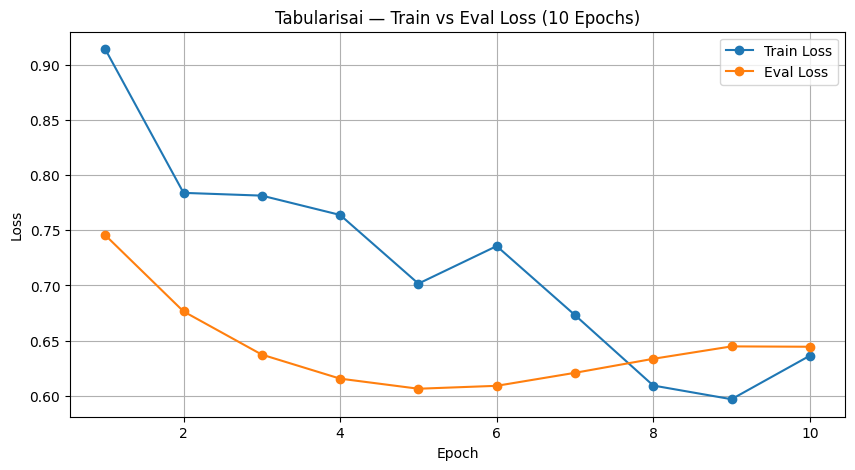

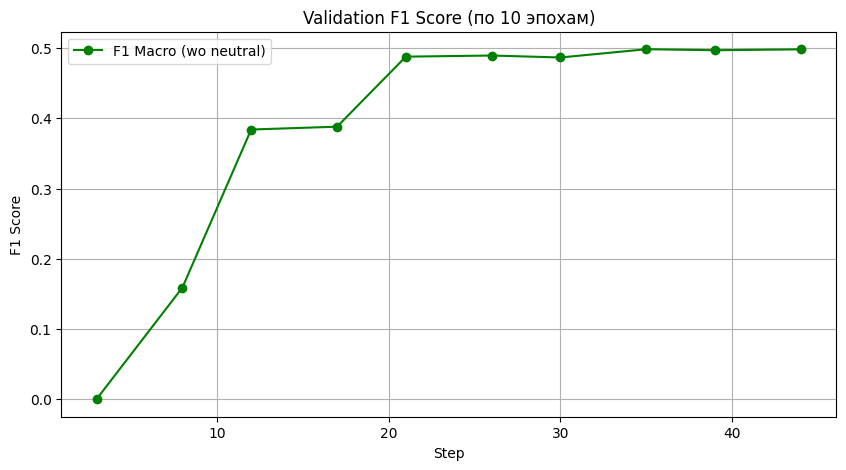

In [ ]:
api = wandb.Api()
run = api.run("demoren_mipt/sentiment-entity-classification/runs/amwmff1v")
history = run.history(samples=10000)

# Построение графика потерь
train_df = history[['_step', 'train/loss']].dropna().reset_index(drop=True)
eval_df = history[['_step', 'eval/loss']].dropna().reset_index(drop=True)

# Сопоставим по индексу — предположим, что train/loss и eval/loss чередуются
min_len = min(len(train_df), len(eval_df))
combined_df = pd.DataFrame({
    'epoch': range(1, min_len + 1),
    'train_loss': train_df['train/loss'][:min_len].values,
    'eval_loss': eval_df['eval/loss'][:min_len].values
})

# Отобразим первые 10 эпох
plot_df = combined_df.head(10)

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(plot_df['epoch'], plot_df['train_loss'], label='Train Loss', marker='o')
plt.plot(plot_df['epoch'], plot_df['eval_loss'], label='Eval Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("DeepPavlov — Train vs Eval Loss (10 Epochs)")
plt.legend()
plt.grid(True)
plt.show()

# Построение графика F1
f1_key = 'eval/f1_macro_wo_neutral'
non_nan_f1 = history[['_step', f1_key]].dropna()
non_nan_f1 = non_nan_f1.head(10)
plt.figure(figsize=(10, 5))
plt.plot(non_nan_f1['_step'], non_nan_f1[f1_key], marker='o', linestyle='-',
         label='F1 Macro (wo neutral)', color='green')
plt.xlabel("Step")
plt.ylabel("F1 Score")
plt.title("Validation F1 Score (по 10 эпохам)")
plt.grid(True)
plt.legend()
plt.show()


['_step', '_runtime', 'train/loss', 'train/grad_norm', 'train/learning_rate', 'train/epoch', '_timestamp', 'train/global_step', 'eval/loss', 'eval/steps_per_second', 'eval/samples_per_second', 'eval/f1_macro_wo_neutral', 'eval/runtime']


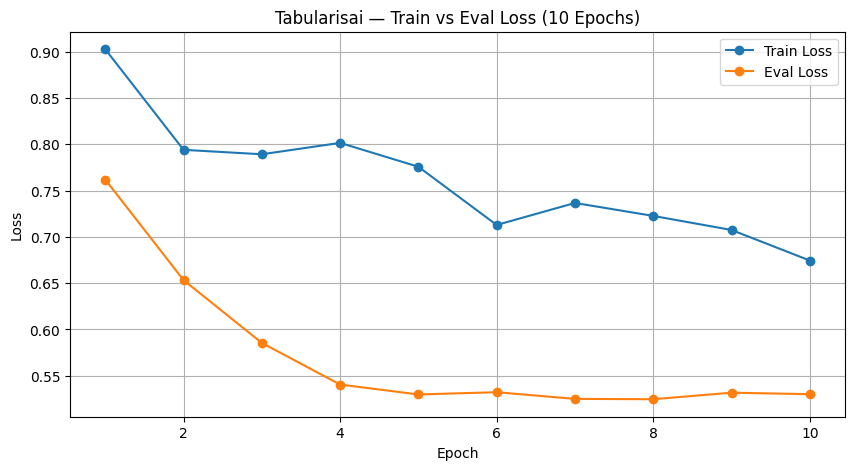

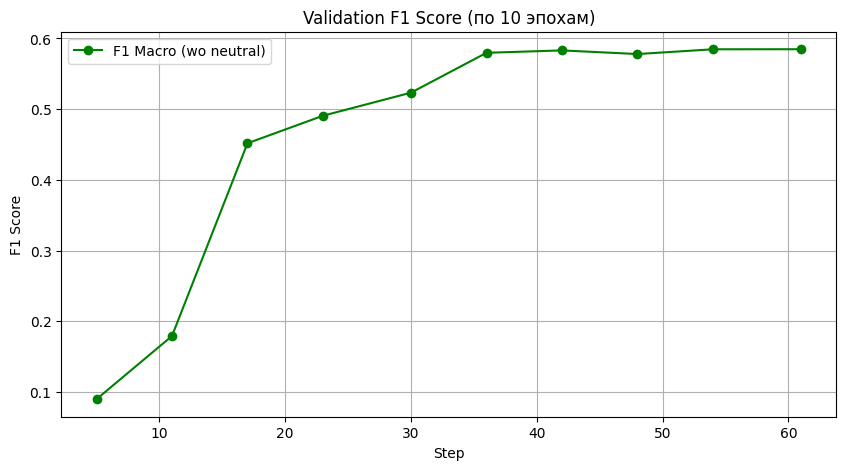

In [23]:
api = wandb.Api()
run = api.run("demoren_mipt/sentiment-entity-classification/runs/thp2ksds")
history = run.history(samples=10000)
print(history.columns.tolist())

# Построение графика потерь
train_df = history[['_step', 'train/loss']].dropna().reset_index(drop=True)
eval_df = history[['_step', 'eval/loss']].dropna().reset_index(drop=True)

# Сопоставим по индексу — предположим, что train/loss и eval/loss чередуются
min_len = min(len(train_df), len(eval_df))
combined_df = pd.DataFrame({
    'epoch': range(1, min_len + 1),
    'train_loss': train_df['train/loss'][:min_len].values,
    'eval_loss': eval_df['eval/loss'][:min_len].values
})

# Отобразим первые 10 эпох
plot_df = combined_df.head(10)

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(plot_df['epoch'], plot_df['train_loss'], label='Train Loss', marker='o')
plt.plot(plot_df['epoch'], plot_df['eval_loss'], label='Eval Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Tabularisai — Train vs Eval Loss (10 Epochs)")
plt.legend()
plt.grid(True)
plt.show()

# Построение графика F1
f1_key = 'eval/f1_macro_wo_neutral'
non_nan_f1 = history[['_step', f1_key]].dropna()
non_nan_f1 = non_nan_f1.head(10)
plt.figure(figsize=(10, 5))
plt.plot(non_nan_f1['_step'], non_nan_f1[f1_key], marker='o', linestyle='-',
         label='F1 Macro (wo neutral)', color='green')
plt.xlabel("Step")
plt.ylabel("F1 Score")
plt.title("Validation F1 Score (по 10 эпохам)")
plt.grid(True)
plt.legend()
plt.show()

## Часть 2.

Современные виртуальные ассистенты &mdash; это сложные системы, состоящие на самом деле из большого количества моделей. Так, например, если мы говорим о голосовых ассистентах, то после запроса пользователя могут решаться следующие задачи:
* распознавание речи,
* предобработка текста,
* распознавание именованных сущностей, намерения пользователя,
* переход в другой навык (сервис), переключение на другую модель.

В этой задаче мы будем пытаться построить свою небольшую модель для распознавания намерения пользователя. Предположим, что в нашего бота Физтех.Статистики мы думаем добавить функциональности. Для каждого запроса на **естественном языке** мы хотим понять намерение пользователя, чтобы связать этот запрос с имеющимися сценариями. Например по запросам "когда дедлайны", "когда следующая лекция", "кому писать с вопросом по большой домашке" мы бы переключались на заготовленный сценарий взаимодействия без необходимости подключения преподавателя. Таким образом, наш роутинг запроса на самом деле сводится к задаче классификации текста, но с некоторыми особенностями. Обычно таких сервисов и сценариев много, при этом к уже имеющимся с течением времени добавляются новые. Возникает необходимость уметь быстро дообучать модель, добавляя новые классы, но и делать это так, чтобы качество для старых оставалось приемлемым.



![intent](https://f.hubspotusercontent20.net/hubfs/2734675/Intent-Classification-blog-images.jpg)

Будем работать с [данными](https://www.kaggle.com/datasets/constantinwerner/qa-intents-dataset-university-domain), которые собраны Новосибирским Государственным Университетом для своего QA-чатбота. Выбор в большой степени обусловлен именно "студенческим доменом". Описание гласит, что датасет содержит 142 интента (класса) и порядка 50-220 фраз на русском языке для каждого.

   0. Проведите небольшую аналитику имеющихся данных. Какой размер датасета? Сколько в среднем у нас имеется примеров на класс?  Что можно сказать насчет длины текстов, с которыми придется работать? С какими запросами приходится иметь дело?

   1. Для начала обучите какую-нибудь модель на основе архитектуры трансформер (например BERT-based модель для русского языка) целиком на исходном датасете. Не забудьте про валидацию. Измерьте качество на тестовой выборке. В качестве целевой метрики используйте точность.

   2. Далее попробуем имитировать следующий сетап. Предположим, что сначала у нас имеется 122 класса, к которым в течение времени планируется добавить еще 20 (а потом может быть еще). Выделите начальные 122 класса и обучите сначала модель на них. Посчитайте точность на тесте. Теперь, когда нам потребуется добавить новые интенты, нам бы не хотелось обучать модель заново, так как это может занять много времени, делать это придется довольно часто, а научиться поддерживать новые сценарии хотелось бы быстро. Мы поступим следующим образом:
       * Будем обучать только слой для классификации. При добавлении новых классов к нему добавляются лишь новые случайно инициализированные строки(столбцы), большой трансформер при этом остается замороженным.
       * Для еще большего ускорения процесса дообучения данные, которые соответствуют "первым" 122 классам можно предварительно пропустить через трансформер, а полученные скрытые состояния сохранить на диск. Таким образом, при появлении новых интентов и данных к ним через замороженный трансформер потребуется прогнать лишь новые тексты.
       * Проведите процесс дообучения на данных, соответствующим всем 142 классам, с учетом вышеизложенных предложений.
       * Сравните получившуюся модель на тестовой выборки с моделью из первого пункта.
    
4. Проведите **один** эксперимент, в котором вы можете:
    * Поэкспериментировать с разными головами для классификации (линейный слой, двухслойный MLP) и пуллингами (`[CLS]`, Mean-pooling).
    * Провести агументации запросов с использованием [augmentex](https://github.com/ai-forever/augmentex). Какие из агументаций наиболее полезны для нашего случая?

5. Сравните результаты с точки зрения значения целевой метрики, а также эффективности по времени обучения и дообучения для разных подходов. Какие плюсы и минусы описанного в втором пункте метода? Какие улучшения вы можете предложить? Попробуйте найти, например, релевантные статьи или блог-посты.

In [ ]:
...